#  *EE559 Project Assignment* 
##  *Student Perfromance Dataset / Classification*

###   Imports

In [46]:
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

#### Functions

In [47]:
# Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

# Trivial classifier - randomly outputs class labels with probability based on class priors
def trivial_classifier(Y_train, data):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/len(Y_train)*100, np.count_nonzero(y_grades_train == 1)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 2)/len(Y_train)*100, np.count_nonzero(y_grades_train == 3)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 4)/len(Y_train)*100]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

# Baseline Model - Nearest Means Classifier
def nearestMeansClassifier(X_train, Y_train, X_test):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    clf = NearestCentroid()
    clf.fit(X_train, y_grades_train)
    Y_test_grades_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_grades_pred[i] = clf.predict(X_test[i].reshape(1, -1))
    
    return Y_test_grades_pred

# Performance Measures
def get_cf_matrix(y, y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    labels = ['F', 'D', 'C', 'B', 'A']
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()

    
        

### **Problem 1**
- Predict first-period academic performance without any prior academic performance data: remove the G2 and G3 columns from the original dataset, then predict G1.

### Read in the data

In [48]:
train_df = pd.read_csv('data/student_performance_test.csv')
#dataset_train = train_df.to_numpy()

In [49]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Removing categorical non-binary features and grades. 

In [50]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [51]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_train
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [52]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [53]:
y_test = test_df.loc[:, test_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

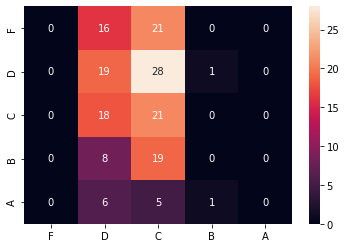

The macro F1 score for the trivial classifier is -  0.12924485125858123
The accuracy for the trivial classifier is -  0.245398773006135


In [54]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred) 
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Reference System - Nearest Means**

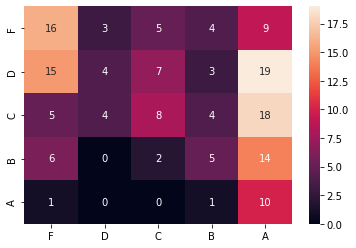

The macro F1 score for the trivial classifier is -  0.25381269372066273
The accuracy for the trivial classifier is -  0.26380368098159507


In [55]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Approach 1: K-Means Clustering**

In [56]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [57]:
len(X_train_scaled[0])

56

In [58]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, algorithm='elkan').fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = kmeans.predict(X_test_scaled)

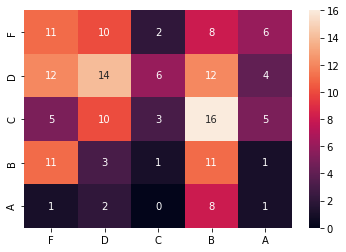

The macro F1 score for the trivial classifier is -  0.21249172503315877
The accuracy for the trivial classifier is -  0.245398773006135


In [60]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [61]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [62]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

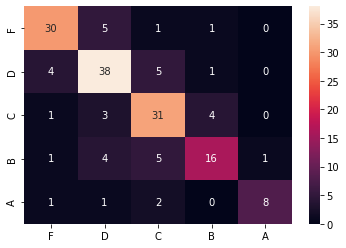

The macro F1 score for the trivial classifier is -  0.748088303337873
The accuracy for the trivial classifier is -  0.754601226993865


In [64]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

### **Problem 2**
- Predict final-period academic performance without any prior academic performance data: remove the G1 and G2 columns from the original dataset, then predict G3.

#### Removing categorical non-binary features and grades. 

In [79]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [80]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

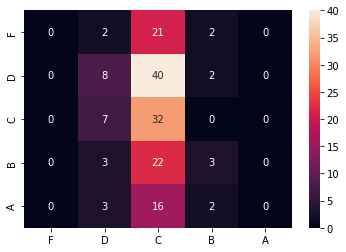

The macro F1 score for the trivial classifier is -  0.15156216651784743
The accuracy for the trivial classifier is -  0.26380368098159507


In [81]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred) 
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Reference System - Nearest Means**

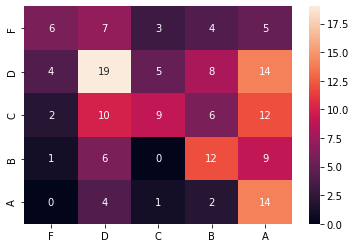

The macro F1 score for the trivial classifier is -  0.3601491228070175
The accuracy for the trivial classifier is -  0.36809815950920244


In [82]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Approach 1: K-Means Clustering**

In [83]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [84]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, algorithm='elkan').fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = kmeans.predict(X_test_scaled)

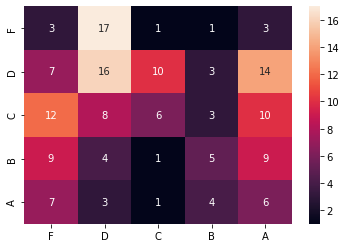

The macro F1 score for the trivial classifier is -  0.2092828353912098
The accuracy for the trivial classifier is -  0.22085889570552147


In [86]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [87]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [88]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

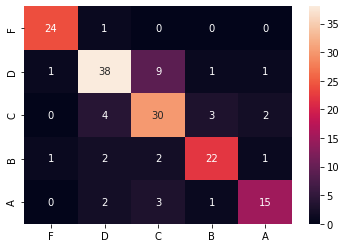

The macro F1 score for the trivial classifier is -  0.7995146382984941
The accuracy for the trivial classifier is -  0.7914110429447851


In [90]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

### **Problem 3**
- Predict final academic performance using all available prior academic performance data: Keep G1 and G2 columns inside the dataset as features, then predict G3.

#### Removing categorical non-binary features.

In [66]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [67]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

#### **Trivial System**

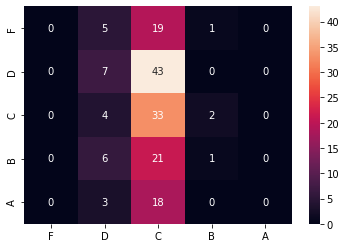

The macro F1 score for the trivial classifier is -  0.12613391136801538
The accuracy for the trivial classifier is -  0.25153374233128833


In [68]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred) 
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Reference System - Nearest Means**

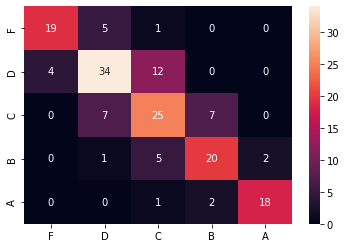

The macro F1 score for the trivial classifier is -  0.7349820799017304
The accuracy for the trivial classifier is -  0.7116564417177914


In [69]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

In [70]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [71]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, algorithm='elkan').fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = kmeans.predict(X_test_scaled)

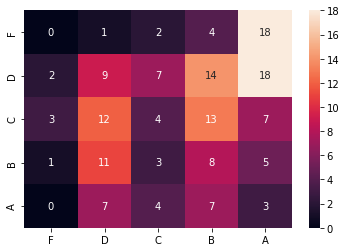

The macro F1 score for the trivial classifier is -  0.12702855397770652
The accuracy for the trivial classifier is -  0.147239263803681


In [73]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)

#### **Aproach 2 - Logistic Regression**
Using cross-entropy loss for the traning algorithm, L2 regularization with dual formulation and saga solver.

In [74]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [75]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', random_state=0, solver='saga', max_iter= 500).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

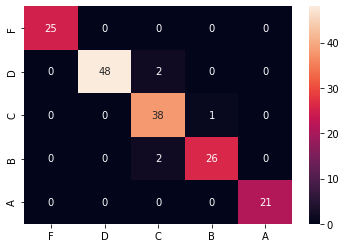

The macro F1 score for the trivial classifier is -  0.9726635974255021
The accuracy for the trivial classifier is -  0.9693251533742331


In [78]:
get_cf_matrix(Y_test_grades_actual, Y_test_grades_pred)
macro_f1_score = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'macro')
print("The macro F1 score for the trivial classifier is - ", macro_f1_score)
accuracy = f1_score(Y_test_grades_actual, Y_test_grades_pred, average = 'micro')
print("The accuracy for the trivial classifier is - ", accuracy)